In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import entropy

In [2]:
df=pd.read_csv('../data/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [8]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.rename(columns={'Na_to_K':'Sodium_to_Potassium','BP':'Blood_Pressure'}, inplace=True)
df['Sex'].replace({'M':'Male', 'F':'Female'}, inplace=True)
df['Sodium_to_Potassium']=df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium']=df['Sodium_to_Potassium'].astype(int)

C:\Users\LOAN\AppData\Local\Temp\ipykernel_21020\3498395464.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'M':'Male', 'F':'Female'}, inplace=True)


In [13]:
df

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


In [14]:
#thống kê số lượng người thuộc 5 nhóm tuổi cao nhất
age_value=df['Age'].value_counts()
top_age=age_value.head(5)
df_top_age=pd.DataFrame({'Age':top_age.index, 'Count':top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,32,6


C:\Users\LOAN\AppData\Local\Temp\ipykernel_21020\911851709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\LOAN\AppData\Local\Temp\ipykernel_21020\911851709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\LOAN\AppData\Local\Temp\ipykernel_21020\911851709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\LOAN\AppData\Local\Temp\ipykernel_21020\911851709.py:4: FutureWarning: 

Passin

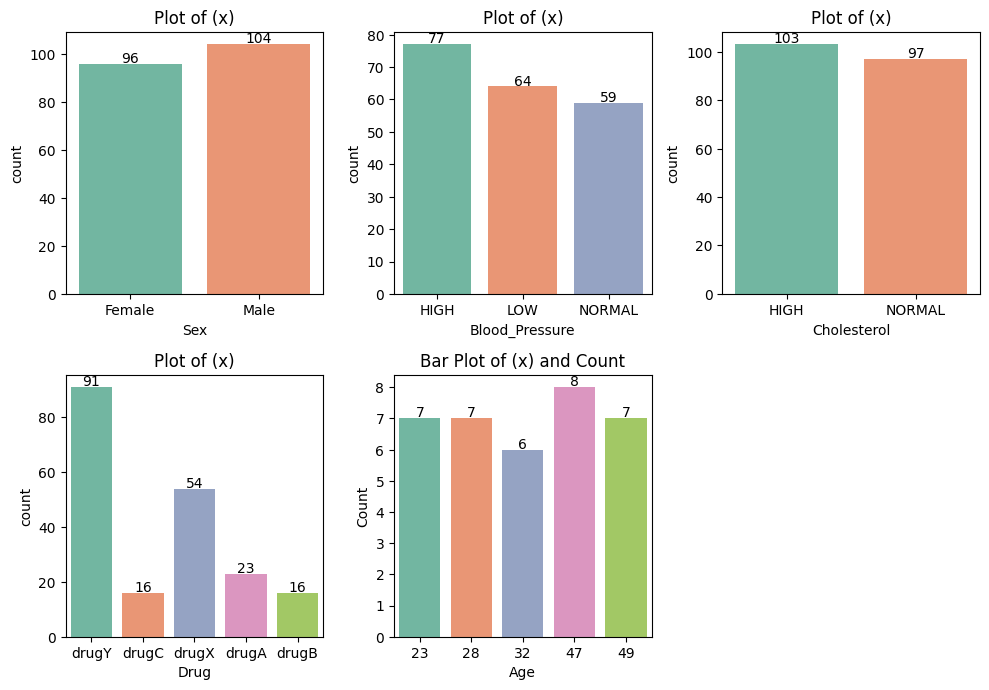

In [20]:
#EDA
def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'): 
    if plot_type == 'count': 
        sns.countplot(x=x, data=data, palette=palette, ax=ax) 
    elif plot_type == 'bar': 
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax) 
    ax.set_title(f'Plot of (x)' if plot_type == 'count' else f'Bar Plot of (x) and {y}') 
    for p in ax.patches: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=10, color='black', 
                    xytext=(0, 1), 
                    textcoords= 'offset points') 
# Create the figure and subplots 
plt.figure(figsize=(10, 10))

#define plot configurations
plot_configs = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count'},
    {'x':'Blood_Pressure', 'data': df, 'plot_type': 'count'},
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
    {'x': 'Drug', 'data': df, 'plot_type': 'count'},
    {'x': 'Age', 'y': 'Count', 'data': df_top_age, 'plot_type': 'bar'},]
# Loop through plot configurations and create subplots
for i, config in enumerate(plot_configs):
    ax = plt.subplot(3, 3, i+1)
    create_plot(ax, **config)
plt.tight_layout()
plt.show()

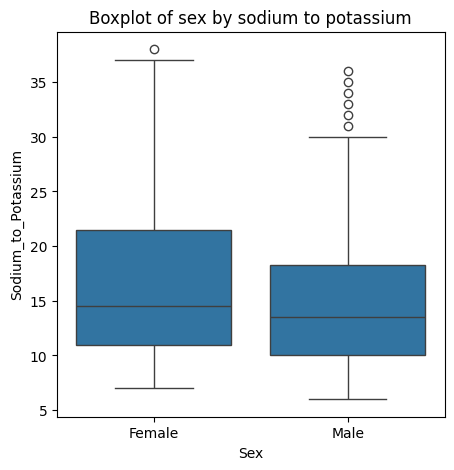

In [22]:
## checking outiers detection through boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(x='Sex',y='Sodium_to_Potassium',data=df)
plt.title('Boxplot of sex by sodium to potassium')
plt.show()

In [35]:
#Feature selection
# feature and target 

X=df.iloc[:, :-1]
y=df.iloc[:, -1]
X


,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium
0,23,Female,HIGH,HIGH,25
1,47,Male,LOW,HIGH,13
2,47,Male,LOW,HIGH,10
3,28,Female,NORMAL,HIGH,8
4,61,Female,LOW,HIGH,18
...,...,...,...,...,...
195,56,Female,LOW,HIGH,12
196,16,Male,LOW,HIGH,12
197,52,Male,NORMAL,HIGH,10
198,23,Male,NORMAL,NORMAL,14


In [36]:
#OneHotEncoder 
onehot_encoder_sex=OneHotEncoder (sparse_output=False) 
one_hot_encoded = onehot_encoder_sex.fit_transform (X[['Sex']]) 
one_hot_df=pd.DataFrame (one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex'])) 
X=pd.concat([X, one_hot_df], axis=1) 
X=X.drop('Sex', axis=1) # Drop the original categorical columns 
#Labelled encoder 
labelled_encoder_blood_pressure =LabelEncoder() 
labelled_encoder_cholesterol =LabelEncoder() 
X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure']) 
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])
X 

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
0,23,0,0,25,1.0,0.0
1,47,1,0,13,0.0,1.0
2,47,1,0,10,0.0,1.0
3,28,2,0,8,1.0,0.0
4,61,1,0,18,1.0,0.0
...,...,...,...,...,...,...
195,56,1,0,12,1.0,0.0
196,16,1,0,12,0.0,1.0
197,52,2,0,10,0.0,1.0
198,23,2,1,14,0.0,1.0


In [30]:
#OneHotEncoder 
# Đảm bảo cột 'Sex' còn tồn tại trong X trước khi one-hot encoding
if 'Sex' in X.columns:
    onehot_encoder_sex = OneHotEncoder(sparse_output=False)
    one_hot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))
    X = pd.concat([X, one_hot_df], axis=1)
    X = X.drop('Sex', axis=1)  # Drop the original categorical column
else:
    print("Cột 'Sex' không tồn tại trong X. Kiểm tra lại quá trình xử lý dữ liệu.")

#Labelled encoder 
labelled_encoder_blood_pressure= LabelEncoder() 
labelled_encoder_cholesterol= LabelEncoder() 
X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure']) 
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol']) 

X

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
0,23,0,0,25,1.0,0.0
1,47,1,0,13,0.0,1.0
2,47,1,0,10,0.0,1.0
3,28,2,0,8,1.0,0.0
4,61,1,0,18,1.0,0.0
...,...,...,...,...,...,...
195,56,1,0,12,1.0,0.0
196,16,1,0,12,0.0,1.0
197,52,2,0,10,0.0,1.0
198,23,2,1,14,0.0,1.0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [38]:
X_train

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
2,47,1,0,10,0.0,1.0
77,26,0,1,19,1.0,0.0
46,37,0,0,13,1.0,0.0
187,47,0,0,10,0.0,1.0
191,23,0,0,8,0.0,1.0
...,...,...,...,...,...,...
106,22,2,0,12,0.0,1.0
14,50,2,0,13,1.0,0.0
92,29,0,0,29,1.0,0.0
179,67,2,0,16,1.0,0.0


In [39]:
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=6,max_leaf_nodes=10)


In [40]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [42]:
dtc.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

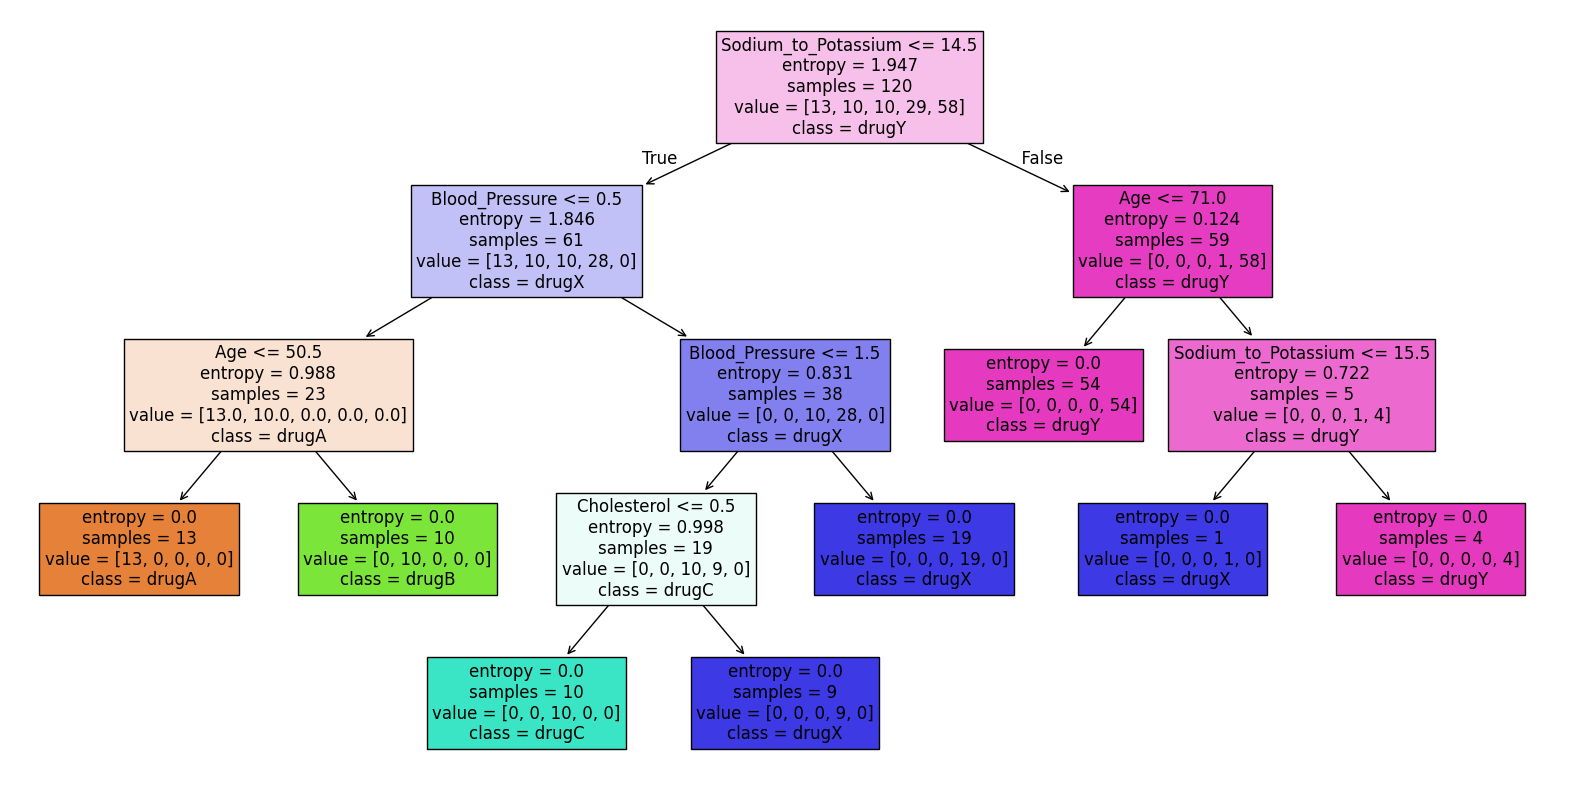

In [43]:
from sklearn.tree import plot_tree

features_cols=X_train.columns
plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=features_cols, class_names=dtc.classes_, filled=True, fontsize=12)

plt.show()

In [49]:
#tính entropy có trọng số (WE)  bà information gain khi tách thành left -right node

def weighted_entropy(left, right, total):
    left_weight = len(left) / total
    right_weight = len(right) / total
    return left_weight * metrics.entropy(left) + right_weight * metrics.entropy(right)

#tính information gain
def information_gain(parent_entropy, left, right, total):
    return parent_entropy - weighted_entropy(left, right, total)
#tính entropy của tập dữ liệu
def calculate_entropy(data):
    class_counts = data.value_counts()
    probabilities = class_counts / len(data)
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Thêm epsilon để tránh log(0)
#tính dựa tree ở trên


In [52]:
# Tính entropy có trọng số và information gain cho node gốc của cây quyết định
# Lấy điều kiện chia đầu tiên từ cây quyết định
from scipy.stats import entropy
# Lấy tree structure
estimator = dtc  # dtc là cây đã huấn luyện ở trên
feature = estimator.tree_.feature[0]
threshold = estimator.tree_.threshold[0]
feature_name = X_train.columns[feature]

# Chia tập train thành left/right theo điều kiện node gốc
left_idx = X_train[feature_name] <= threshold
right_idx = X_train[feature_name] > threshold
left_y = y_train[left_idx]
right_y = y_train[right_idx]

# Hàm tính weighted entropy
def weighted_entropy_v2(left, right, total):
    left_weight = len(left) / total
    right_weight = len(right) / total
    # Đếm số lượng từng class
    left_counts = left.value_counts().values
    right_counts = right.value_counts().values
    # Tính xác suất
    left_probs = left_counts / left_counts.sum()
    right_probs = right_counts / right_counts.sum()
    # Tính entropy
    left_entropy = entropy(left_probs, base=2)
    right_entropy = entropy(right_probs, base=2)
    return left_weight * left_entropy + right_weight * right_entropy

# Tính entropy của tập cha (root)
parent_counts = y_train.value_counts().values
parent_probs = parent_counts / parent_counts.sum()
parent_entropy = entropy(parent_probs, base=2)
# Tính weighted entropy
we = weighted_entropy_v2(left_y, right_y, len(y_train))
# Tính information gain
ig = parent_entropy - we

print(f"Điều kiện chia node gốc: {feature_name} <= {threshold:.3f}")
print(f"Entropy tập cha: {parent_entropy:.4f}")
print(f"Weighted Entropy: {we:.4f}")
print(f"Information Gain: {ig:.4f}")

Điều kiện chia node gốc: Sodium_to_Potassium <= 14.500
Entropy tập cha: 1.9470
Weighted Entropy: 0.9995
Information Gain: 0.9475


In [53]:
#Accruracy
y_test_pred = dtc.predict(X_test)
accuracy = 100*metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.4f}")

Accuracy of the Decision Tree Classifier: 98.7500


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix=confusion_matrix(y_test, y_test_pred)
cf_matrix

array([[10,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  1, 32]])

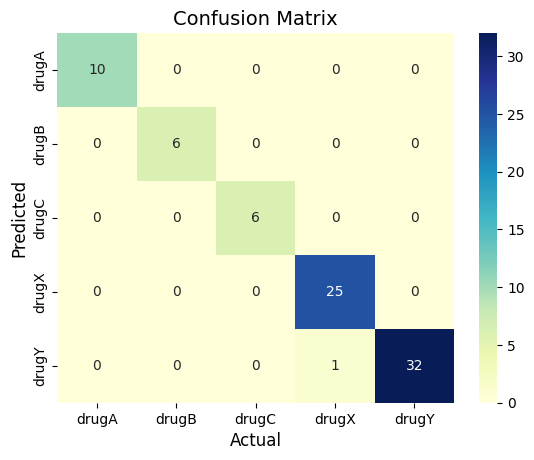

In [55]:
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Predicted',fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [56]:
micro_presision = metrics.precision_score(y_test, y_test_pred, average='micro')
print(f"Micro Precision: {micro_presision:.4f}")

Micro Precision: 0.9875


In [57]:
from sklearn.metrics import classification_report, confusion_matrix
targer_names = ['DrugY', 'DrugX', 'DrugA', 'DrugB', 'DrugC']
print(classification_report(y_test, y_test_pred, target_names=targer_names))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        10
       DrugX       1.00      1.00      1.00         6
       DrugA       1.00      1.00      1.00         6
       DrugB       0.96      1.00      0.98        25
       DrugC       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

